# Basics

## Import Libraries

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
print(tf.__version__)

2.6.0


## Download Datasets

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-12-15 10:02:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.186.176, 142.250.185.240, 172.217.18.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.186.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5,4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5,38M  4,32MB/s    in 1,2s    

2021-12-15 10:02:15 (4,32 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



# Data Preprocessing

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [5]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Training

In [9]:
 model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2021-12-15 10:02:16.436837: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

2021-12-15 10:02:17.154328: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
625/625 - 1s - loss: 0.6699 - accuracy: 0.5778 - val_loss: 0.6021 - val_accuracy: 0.7149
Epoch 2/30
625/625 - 1s - loss: 0.4510 - accuracy: 0.8249 - val_loss: 0.3933 - val_accuracy: 0.8362
Epoch 3/30
625/625 - 1s - loss: 0.3208 - accuracy: 0.8748 - val_loss: 0.3649 - val_accuracy: 0.8414
Epoch 4/30
625/625 - 1s - loss: 0.2692 - accuracy: 0.8950 - val_loss: 0.3439 - val_accuracy: 0.8571
Epoch 5/30
625/625 - 1s - loss: 0.2320 - accuracy: 0.9092 - val_loss: 0.3422 - val_accuracy: 0.8562
Epoch 6/30
625/625 - 1s - loss: 0.2042 - accuracy: 0.9211 - val_loss: 0.3462 - val_accuracy: 0.8560
Epoch 7/30
625/625 - 1s - loss: 0.1828 - accuracy: 0.9311 - val_loss: 0.3559 - val_accuracy: 0.8533
Epoch 8/30
625/625 - 1s - loss: 0.1630 - accuracy: 0.9400 - val_loss: 0.3677 - val_accuracy: 0.8548
Epoch 9/30
625/625 - 1s - loss: 0.1489 - accuracy: 0.9460 - val_loss: 0.3866 - val_accuracy: 0.8532
Epoch 10/30
625/625 - 1s - loss: 0.1359 - accuracy: 0.9517 - val_loss: 0.3976 - val_accuracy: 0.8526

## Plotting

In [18]:
import os
import sys
script_path=os.environ.get('DirForPoolScripts')
sys.path.append(script_path)  

<Figure size 432x288 with 0 Axes>

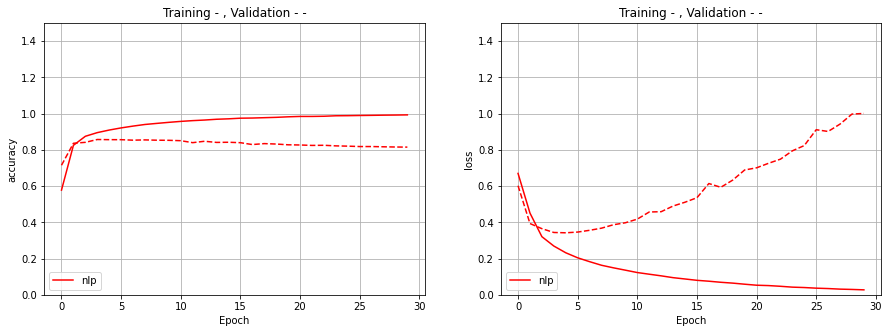

In [19]:
from ploting_script import plot_n_model 
plot_n_model(num_history=1, name_history=[history], label_list=["nlp"], ylim_low=0, ylim_high=1.5)

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [15]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [16]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [17]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.0370435e-01]
 [1.8445431e-05]]
